# Вычислительная математика
## Интегрирование

Иван Цыбулин, Ярослав Холодов

## Задача численного интегрирования

Требуется вычислить определенный интеграл
$$
\int_a^b f(x) dx
$$
Интеграл предполагается собственным, то есть $a, b \neq \infty$, $|f(x)| < \infty$.

### Приближение подынтегральной функции

Для вычисления интеграла, подынтегральную функцию приближают интегрируемой аналитически. Самый простой вариант &mdash; приблизить функцию интерполяционным многочленом:
$$
\int_a^b f(x) dx \approx \int_a^b P(x) dx
$$

Формулы численного интегрирования называются также *квадратурными формулами* или *квадратурами*.

### Формулы для равномерной сетки

Будем приближать функцию на отрезке $[a,b]$ интерполяционным многочленом на равномерной сетке:
* $P_0(x) = f(a)$. Получится формула прямоугольников:
$
\displaystyle \int_a^b f(x) dx \approx (b-a) f(a)
$
* $P_1(x) = f(a) + (x-a) \frac{f(b) - f(a)}{b-a}$. Получится формула трапеций:
$
\displaystyle \int_a^b f(x) dx \approx (b-a) \frac{f(a) + f(b)}{2}
$

### Формула Симпсона

Для случая $p = 2$ получаем формулу Симпсона
$$
\int_a^b f(x) dx = (b-a) \left[f(a) w_0 + f\left(\frac{a+b}{2}\right) w_1 + f(b) w_0\right],\\
w_0 = \frac{1}{2}\int_{-1}^1 \frac{x(x-1)}{2} dx = \frac{1}{6}\\
w_1 = \frac{1}{2}\int_{-1}^1 (1-x^2) dx = \frac{2}{3}\\
w_2 = \frac{1}{2}\int_{-1}^1 \frac{x(x+1)}{2} dx = \frac{1}{6}
$$

### Составные формулы

Разобьем отрезок $[a,b]$ на равные интервалы длины $h = \frac{b-a}{n}$. Применим к каждому отдельному интервалу формулу прямоугольников
$$
\int_a^b f(x) dx = \sum_{i=1}^n \int_{x_{i-1}}^{x_i} f(x) dx \approx h \sum_{i=1}^{n} f(x_{i-1}).
$$

Применив к каждому формулу трапеций, получаем
$$
\int_a^b f(x) dx = \sum_{i=1}^n \int_{x_{i-1}}^{x_i} f(x) dx \approx 
h \sum_{i=1}^{n} \frac{f(x_{i-1}) + f(x_i)}{2} =\\
= \frac{h}{2} \left(f(x_0) + 2f(x_1) + \dots + 2f(x_{n-1}) + f(x_n)\right)
$$

Объединив интервалы по два и применив к каждой паре формулу Сипсона, получаем
$$
\int_a^b f(x) dx = \sum_{i=1}^{n/2} \int_{x_{2i-2}}^{x_{2i}} f(x) dx \approx 
2h \sum_{i=1}^{n/2} \frac{f(x_{2i-2}) + 4 f(x_{2i-1}) + f(x_{2i})}{6} =\\
= \frac{h}{3} \left(f(x_0) + 4f(x_1) + 2f(x_2) + 4f(x_3) + \dots + \\
\phantom{z}\qquad\qquad + 4f(x_{n-3}) + 2f(x_{n-2}) + 4f(x_{n-1}) + f(x_n)\right)
$$

### Погрешность составных формул
Пусть элементарная квадратурная формула на одном интервале имеет остаточный член вида
$$
R_1 = C (b-a)^{k+1} f^{(k)}(\xi).
$$
Тогда суммарная ошибка на всех интервалах
$$
R_\text{сост} = C h^{k+1} \sum_{i=1}^n f^{(k)}(\xi_i),\\
|R_\text{сост}| \leqslant C h^{k+1} \sum_{i=1}^n |f^{(k)}(\xi_i)| 
\leqslant C (b-a) h^k \max_{x \in [a,b]} |f^{(k)}(x)|
$$

### Погрешности составных формул

$p$ | $n$ | Название | Погрешность
-|-|-|-
$0$ | $\forall$ | Прямоугольников | $\frac{(b-a) h}{2} M_1$
$1$ | $\forall$ | Трапеций | $\frac{(b-a) h^2}{12} M_2$
$2$ | $n = 2m$ | Симпсона | $\frac{(b-a) h^4}{180} M_4$
$3$ | $n = 3m$ | Формула 3/8 | $\frac{(b-a) h^4}{80} M_4$

### Точность квадратурных формул

Алгебраической степенью точности квадратурной формулы называют такое число $d$, что квадратурная формула точна для всех многочленов степени $d$, но для некоторых многочленов степени $d+1$ уже не точна. Из вида остаточного члена заключаем, что метод прямоугольников имеет $d=0$, метод трапеций $d=1$, методы Симпсона и 3/8 $d=3$.


In [1]:
def rectangle(f, h):
    return h * sum(f[:-1])

def trapezoid(f, h):
    return 0.5 * h * (f[0] + 2 * sum(f[1:-1]) + f[-1])

def simpson(f, h):
    assert (len(f)-1) % 2 == 0
    return h/3. * (f[0] + 4 * sum(f[1:-1:2]) + \
                   2 * sum(f[2:-2:2]) + f[-1])

def threeeights(f, h):
    assert (len(f)-1) % 3 == 0
    return 3*h/8. * (f[0] + 3 * sum(f[1:-1:3]) + \
                3 * sum(f[2:-1:3]) + 2 * sum(f[3:-3:3]) + f[-1])

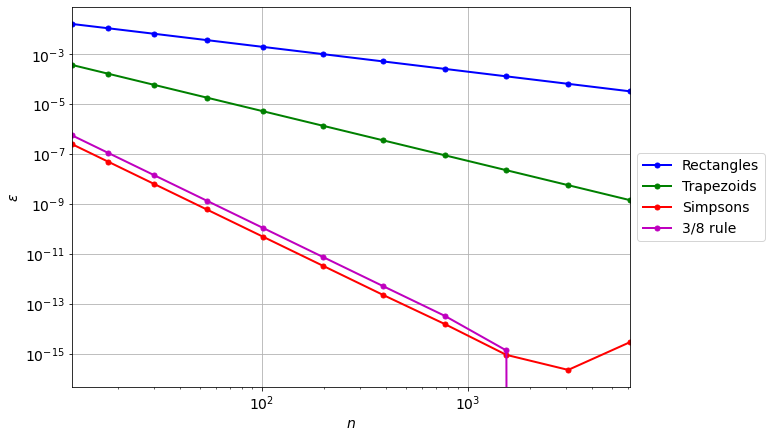

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', **{'size' : 14})

def f(x): return 4 / (1 + x*x)
exact = 4 * np.arctan(0.5)

ns = 6 + 3 * 2**np.arange(1, 12)
errs = []
for n in ns:
    x = np.linspace(0, 0.5, n+1)
    fv = f(x)
    I1 = rectangle(fv, x[1] - x[0])
    I2 = trapezoid(fv, x[1] - x[0])
    I3 = simpson(fv, x[1] - x[0])
    I4 = threeeights(fv, x[1] - x[0])
    errs.append([abs(I1-exact), abs(I2-exact), abs(I3-exact), abs(I4-exact)])

errs=np.array(errs)
    
plt.figure(figsize=(10, 7))
plt.loglog(ns, errs[:, 0], 'b.-', label='Rectangles', lw=2, ms=10)
plt.loglog(ns, errs[:, 1], 'g.-', label='Trapezoids', lw=2, ms=10)
plt.loglog(ns, errs[:, 2], 'r.-', label='Simpson''s', lw=2, ms=10)
plt.loglog(ns, errs[:, 3], 'm.-', label='3/8 rule', lw=2, ms=10)
plt.legend(loc='center left', bbox_to_anchor=(1, .5))
plt.xlabel('$n$')
plt.ylabel('$\\varepsilon$')
plt.xlim(ns[0], ns[-1])
plt.grid()
plt.show()

### Практическая оценка погрешности
Не всегда на практике удается воспользоваться априорной оценкой вида
$$
\varepsilon \leqslant C M_p h^p,
$$
так как не всегда удается оценить $M_p$ для подынтегральной функции. В этом случае, обычно, пользуются правилом Рунге для определения подходящего шага $h$.

### Правило Рунге
Предположим, что нам известен порядок метода, которым мы хотим найти значение интеграла с заданной точностью $\varepsilon$. Тогда результат, вычисленный этим методом с шагом $h$ будет иметь вид
$$
I_h = I^* + \underbrace{C_1 h^p + C_2 h^{p+1} + \dots}_\text{ошибка интегрирования}.
$$
Здесь $I^*$ &mdash; точное значение интеграла. Для достаточно малых $h$ можно записать
$$
I_h = I^* + C_h h^p,
$$
где $C_h$ &mdash; почти константа, то есть слабо зависит от $h$.

Вычислим интеграл с шагом $h$ и с шагом $h/2$:
$$
I_h = I^* + C_1 h^p + C_2 h^{p+1} + \dots\\
I_{h/2} = I^* + C_1 \left(\frac{h}{2}\right)^p + C_2 \left(\frac{h}{2}\right)^{p+1} + \dots
$$
Тогда
$$
I_h - I_{h/2} = C_h h^p - C_{h/2} \left(\frac{h}{2}\right)^p \approx (2^p - 1) C_{h/2} \left(\frac{h}{2}\right)^p = (2^p - 1) (I_{h/2} - I^*)\\
$$

Таким образом, погрешность интегрирования на сетке $h/2$ может быть оценена как
$$
I_{h/2} - I^* \approx \frac{I_h - I_{h/2}}{2^p - 1}.
$$


### Использование правила Рунге
Алгоритм применения правила Ругне следующий:
1. Задать небольшое число интевалов, скажем $n = 10$
2. Вычислить $I_h, I_{h/2}$ и оценить ошибку
$$
\Delta_{h/2} = \frac{I_h - I_{h/2}}{2^p - 1}.
$$
3. Если $|\Delta_{h/2}| < \varepsilon$, прекратить вычисления. Иначе измельчить сетку вдвое $h := h/2$ и перейти к шагу 2.
4. Ответом служит $I_{h/2}$.

In [17]:
def runge(f, a, b, eps=1e-12):    
    n = 4
    Ih = simpson(f(np.linspace(a, b, n+1)), (b-a) / n)
    while True:
        Ih_2 = simpson(f(np.linspace(a, b, 2*n+1)), (b-a) / (2*n))
        Dh_2 = (Ih - Ih_2) / (2**4 - 1) # p = 4 для Симпсона
        print('I(h) = %.16f, err(h) = %.6e' % (Ih_2, Dh_2))
        if abs(Dh_2) < eps:
            break
        n *= 2; Ih = Ih_2
        if n > 10000: print('Too large n'); break
    return Ih_2

In [18]:
def f(x): return 1 / (1 + x**2)
a = 0; b = 0.5; exact = np.arctan(b)

runge(f, a, b) - exact

I(h) = 0.4636479223346336, err(h) = 3.157185e-07
I(h) = 0.4636476285453064, err(h) = 1.958596e-08
I(h) = 0.4636476102217171, err(h) = 1.221573e-09
I(h) = 0.4636476090771032, err(h) = 7.630759e-11
I(h) = 0.4636476090055746, err(h) = 4.768578e-12
I(h) = 0.4636476090011042, err(h) = 2.980246e-13


2.9809488211185453e-13

### Дополнительные проверки
Для проверки корректности использования правила Рунге достаточно проверять условия
* что метод фактически сходится с порядком $p$,
$$
\frac{\Delta_{h}}{\Delta_{h/2}} \approx 2^p
$$
* что константа $C_h$ слабо зависит от $h$:
$$
C_h = \frac{\Delta_h}{h^p} \to C = \mathrm{const}
$$

In [21]:
def runge_checks(f, a, b, eps=1e-12):
    n = 4
    Ih = simpson(f(np.linspace(a, b, n+1)), (b-a) / n)
    Dh = None;
    while True:
        h_2 = (b-a) / (2*n)
        Ih_2 = simpson(f(np.linspace(a, b, 2*n+1)), h_2)
        Dh_2 = (Ih - Ih_2) / (2**4 - 1) # p = 4 для Симпсона
        Ch_2 = Dh_2 / h_2**4; ps = np.log2(Dh / Dh_2) if Dh != None else np.nan
        print('I(h) = %.16f, err(h) = %.6e, p* = %4.2f, C = %.6e' % \
              (Ih_2, Dh_2, ps, Ch_2))
        if abs(Dh_2) < eps:
            break
        n *= 2; Ih = Ih_2; Dh = Dh_2
        if n > 10000: print('Too large n'); break
    return Ih_2

In [22]:
def f(x): return 1 / (1 + x**2)
a = 0; b = 0.5; exact = np.arctan(b)

runge_checks(f, a, b) - exact

I(h) = 0.4636479223346336, err(h) = 3.157185e-07, p* =  nan, C = 2.069093e-02
I(h) = 0.4636476285453064, err(h) = 1.958596e-08, p* = 4.01, C = 2.053736e-02
I(h) = 0.4636476102217171, err(h) = 1.221573e-09, p* = 4.00, C = 2.049459e-02
I(h) = 0.4636476090771032, err(h) = 7.630759e-11, p* = 4.00, C = 2.048366e-02
I(h) = 0.4636476090055746, err(h) = 4.768578e-12, p* = 4.00, C = 2.048089e-02
I(h) = 0.4636476090011042, err(h) = 2.980246e-13, p* = 4.00, C = 2.048009e-02


2.9809488211185453e-13